In [ ]:
import matplotlib.pyplot as plt

from pyspark.sql import SparkSession

In [ ]:
# init spark session
spark = SparkSession.builder.master('local[*]').getOrCreate()
spark

In [ ]:
review_fp = "hdfs://namenode:9000/preprocessed"
df = spark.read.parquet(review_fp, header=True, inferSchema=True)
df.printSchema()
print(f'Total reviews: {df.count()}')
df.show(5)

## Word Count by Sentiment & Place_Index

In [ ]:
# Tạo DataFrame từ filtered_sent_place
sent_place_df = spark.createDataFrame(
    [Row(word=k[0], sentiment=k[1], place=k[2], count=v) 
     for k, v in filtered_sent_place.collect()]
)

# Hiển thị top từ theo từng place, sắp xếp theo count
print('Top frequency keywords by place (ordered by count):')

# Lấy danh sách các place có trong dữ liệu
places = [row['place'] for row in sent_place_df.select('place').distinct().collect()]

for place in sorted(places):
    print(f"\nPlace {place}:")
    (sent_place_df.filter(F.col('place') == place)
        .orderBy('count', ascending=False)
        .show(10, truncate=False)) # Hiển thị top 10 từ mỗi place

Top frequency keywords by place (ordered by count):

Place 0:
+----------+---------+-----+-----+
|word      |sentiment|place|count|
+----------+---------+-----+-----+
|ngon      |positive |0    |72   |
|nhân_viên |positive |0    |65   |
|gà        |positive |0    |46   |
|nhiệt_tình|positive |0    |46   |
|đồ        |positive |0    |35   |
|phục_vụ   |positive |0    |24   |
|thân_thiện|positive |0    |20   |
|gà        |negative |0    |18   |
|dễ_thương |positive |0    |18   |
|quán      |positive |0    |17   |
+----------+---------+-----+-----+
only showing top 10 rows


Place 1:
+----------+---------+-----+-----+
|word      |sentiment|place|count|
+----------+---------+-----+-----+
|ngon      |positive |1    |82   |
|nhân_viên |positive |1    |81   |
|đồ        |positive |1    |45   |
|nhiệt_tình|positive |1    |41   |
|phục_vụ   |positive |1    |32   |
|dễ_thương |positive |1    |25   |
|thân_thiện|positive |1    |21   |
|không_gian|positive |1    |19   |
|gà        |positive |1    

In [ ]:
sent_place_df = spark.createDataFrame(
    [Row(word=k[0], sentiment=k[1], place=k[2],count=v) 
     for k, v in filtered_sent_place.collect()]
)

print('Top 50 frequency keywords by rating:')
sent_place_df.orderBy('count', ascending=False).show(50, truncate=False)

Top 50 frequency keywords by rating:
+----------+---------+-----+-----+
|word      |sentiment|place|count|
+----------+---------+-----+-----+
|nhân_viên |positive |7    |96   |
|nhân_viên |positive |15   |93   |
|ngon      |positive |12   |93   |
|nhân_viên |positive |3    |89   |
|ngon      |positive |5    |88   |
|nhân_viên |positive |12   |88   |
|ngon      |positive |8    |84   |
|ngon      |positive |1    |82   |
|ngon      |positive |7    |82   |
|nhân_viên |positive |1    |81   |
|ngon      |positive |4    |80   |
|ngon      |positive |15   |79   |
|ngon      |positive |14   |78   |
|nhân_viên |positive |5    |77   |
|nhân_viên |positive |14   |75   |
|ngon      |positive |0    |72   |
|ngon      |positive |16   |66   |
|nhân_viên |positive |8    |66   |
|ngon      |positive |13   |66   |
|nhân_viên |positive |0    |65   |
|ngon      |positive |11   |61   |
|ngon      |positive |21   |60   |
|đồ        |positive |12   |60   |
|nhân_viên |positive |13   |59   |
|ngon      |positi

In [ ]:
place_names = {
    0: 'Phan Huy Ích',
    1: 'Nguyễn Văn Quá',
    2: 'Pandora',
    3: 'Tân Sơn Nhì',
    4: 'Aeon Mall Tân Phú',
    5: 'Phạm Văn Chiêu',
    6: 'Tops Market',
    7: 'Đồng Đen',
    8: 'Maximark Cộng Hòa',
    9: 'Tân Kỳ Tân Quý',
    10: 'Coopmart Nguyễn Ảnh Thủ',
    11: 'Thống Nhất',
    12: 'Nguyễn Sơn',
    13: 'Vincom Quang Trung',
    14: 'Lý Thường Kiệt',
    15: 'Ngô Gia Tự',
    16: 'Xóm Củi',
    18: 'Quang Trung',
    19: 'Lê Văn Việt',
    20: 'Cách Mạng Tháng 8',
    21: 'Âu Cơ'
}

@F.udf()
def get_place_name(place_num):
    return place_names.get(place_num, f"Unknown Place {place_num}")

sent_place_df = sent_place_df.withColumn("place_name", get_place_name(F.col("place")))

print('Top frequency keywords by place (with place names):')


named_places = sorted([p for p in places if p in place_names])

for place_num in named_places:
    place_name = place_names[place_num]
    print(f"\nPlace {place_num} - {place_name}:")
    (sent_place_df.filter(F.col('place') == place_num)
        .orderBy('count', ascending=False)
        .select('word', 'sentiment', 'count', 'place_name')
        .show(10, truncate=False))

Top frequency keywords by place (with place names):

Place 0 - Phan Huy Ích:
+----------+---------+-----+------------+
|word      |sentiment|count|place_name  |
+----------+---------+-----+------------+
|ngon      |positive |72   |Phan Huy Ích|
|nhân_viên |positive |65   |Phan Huy Ích|
|gà        |positive |46   |Phan Huy Ích|
|nhiệt_tình|positive |46   |Phan Huy Ích|
|đồ        |positive |35   |Phan Huy Ích|
|phục_vụ   |positive |24   |Phan Huy Ích|
|thân_thiện|positive |20   |Phan Huy Ích|
|gà        |negative |18   |Phan Huy Ích|
|dễ_thương |positive |18   |Phan Huy Ích|
|quán      |positive |17   |Phan Huy Ích|
+----------+---------+-----+------------+
only showing top 10 rows


Place 1 - Nguyễn Văn Quá:
+----------+---------+-----+--------------+
|word      |sentiment|count|place_name    |
+----------+---------+-----+--------------+
|ngon      |positive |82   |Nguyễn Văn Quá|
|nhân_viên |positive |81   |Nguyễn Văn Quá|
|đồ        |positive |45   |Nguyễn Văn Quá|
|nhiệt_tình|positi

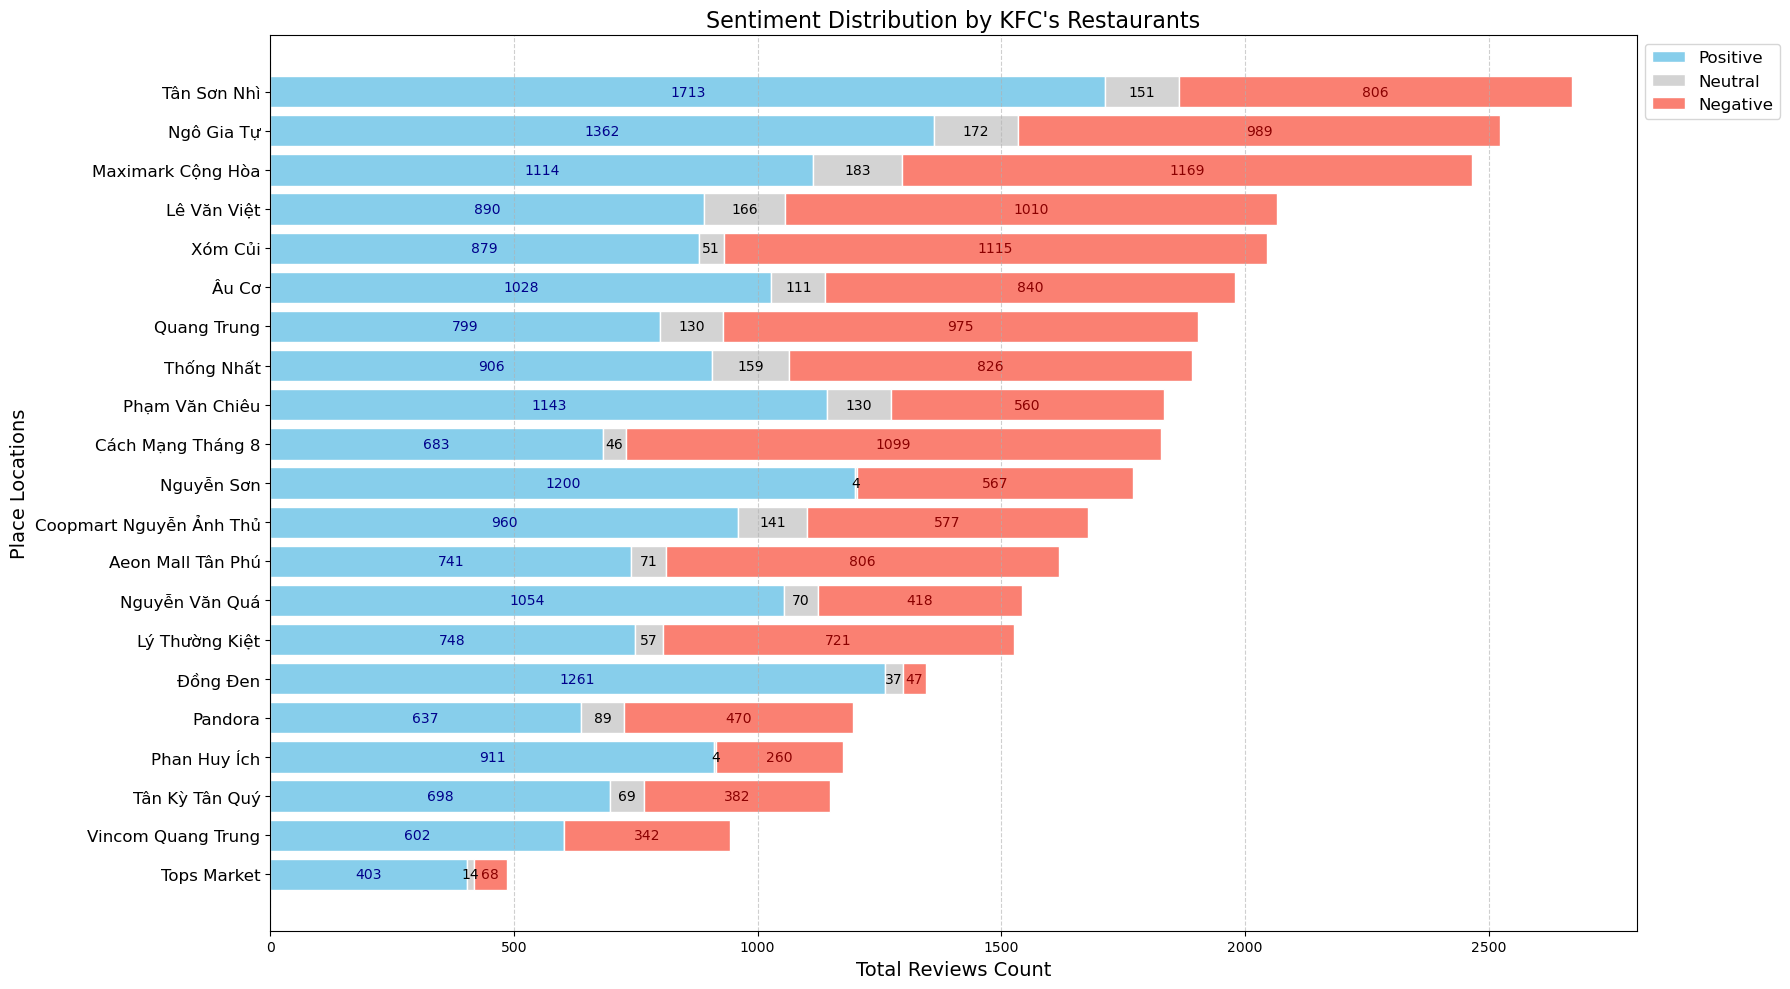

In [ ]:
sentiment_by_place = (
    sent_place_df.groupBy("place_name", "sentiment")
    .agg(F.sum("count").alias("total_count"))
    .orderBy("place_name")
)

pdf = sentiment_by_place.toPandas()
pivot_df = pdf.pivot(index="place_name", columns="sentiment", values="total_count").fillna(0)

for sentiment in ['positive', 'neutral', 'negative']:
    if sentiment not in pivot_df.columns:
        pivot_df[sentiment] = 0

# Visualize stacked bar
plt.figure(figsize=(18, 10))
pivot_df['Total'] = pivot_df.sum(axis=1)
pivot_df = pivot_df.sort_values('Total', ascending=True)

p1 = plt.barh(pivot_df.index, pivot_df['positive'], 
              color='skyblue', label='Positive', edgecolor='white')
p2 = plt.barh(pivot_df.index, pivot_df['neutral'], 
              left=pivot_df['positive'],
              color='lightgray', label='Neutral', edgecolor='white')
p3 = plt.barh(pivot_df.index, pivot_df['negative'], 
              left=pivot_df['positive'] + pivot_df['neutral'],
              color='salmon', label='Negative', edgecolor='white')

for i, place in enumerate(pivot_df.index):
    # Positive
    if pivot_df['positive'].iloc[i] > 0:
        plt.text(pivot_df['positive'].iloc[i]/2, i,
                str(int(pivot_df['positive'].iloc[i])), 
                va='center', ha='center', color='darkblue', fontsize=10)
    
    # Neutral
    if pivot_df['neutral'].iloc[i] > 0:
        plt.text(pivot_df['positive'].iloc[i] + pivot_df['neutral'].iloc[i]/2, i,
                str(int(pivot_df['neutral'].iloc[i])), 
                va='center', ha='center', color='black', fontsize=10)
    
    # Negative
    total = pivot_df['positive'].iloc[i] + pivot_df['neutral'].iloc[i] + pivot_df['negative'].iloc[i]
    if pivot_df['negative'].iloc[i] > 0:
        plt.text(pivot_df['positive'].iloc[i] + pivot_df['neutral'].iloc[i] + pivot_df['negative'].iloc[i]/2, i,
                str(int(pivot_df['negative'].iloc[i])), 
                va='center', ha='center', color='darkred', fontsize=10)

plt.yticks(range(len(pivot_df.index)), pivot_df.index, fontsize=12)
plt.xlabel('Total Reviews Count', fontsize=14)
plt.ylabel('Place Locations', fontsize=14)
plt.title("Sentiment Distribution by KFC's Restaurants", fontsize=16)
plt.legend(fontsize=12, bbox_to_anchor=(1, 1), loc='upper left')
plt.grid(axis='x', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()